In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle



# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


In [7]:

# Load the dataset
df = pd.read_csv('./data_set_norman_gen-5000.csv')


In [8]:

# Drop irrelevant columns
df = df.drop(['Age','Education_Level','Years_of_Experience','UI_UX_Proficiency','Communication_Skills','Time_Management_Skills','Preferred_work_environment'
             ,'Career_goal','Prototyping_Wireframing_Skills','Flexibility','Staying_Updated_Skills'], axis=1)


In [9]:
# Check for missing values and data types
df.dtypes



Programming_Languages_Proficiency     int64
Web_Development_Proficiency           int64
Mobile_Development_Proficiency        int64
Data_Science_Proficiency              int64
DevOps_Proficiency                    int64
Cybersecurity_Proficiency             int64
AI_ML_Proficiency                     int64
Game_Development_Proficiency          int64
Database_Proficiency                  int64
API_Proficiency                       int64
Full_Stack_Proficiency                int64
Problem_Solving_Skills                int64
Collaboration_Skills                  int64
Graphic_Design_Proficiency            int64
Web_Security_Knowledge                int64
Performance_Optimization_Skills       int64
SEO_Knowledge                         int64
Testing_Debugging_Skills              int64
Preferred_technology_stack           object
Predicted_career_path                object
dtype: object

In [10]:
df.head(10)

,Programming_Languages_Proficiency,Web_Development_Proficiency,Mobile_Development_Proficiency,Data_Science_Proficiency,DevOps_Proficiency,Cybersecurity_Proficiency,AI_ML_Proficiency,Game_Development_Proficiency,Database_Proficiency,API_Proficiency,Full_Stack_Proficiency,Problem_Solving_Skills,Collaboration_Skills,Graphic_Design_Proficiency,Web_Security_Knowledge,Performance_Optimization_Skills,SEO_Knowledge,Testing_Debugging_Skills,Preferred_technology_stack,Predicted_career_path
0,5,1,5,1,4,8,5,5,2,1,2,4,8,2,8,6,5,7,Linux,IT Support
1,9,2,4,1,9,2,2,3,7,6,5,7,9,10,1,7,4,6,Docker,DevOps
2,5,3,1,3,1,9,5,4,4,1,3,7,2,9,2,6,4,9,Linux,IT Support
3,8,3,3,3,4,7,1,3,2,5,4,1,4,1,2,6,6,5,Linux,IT Support
4,10,7,7,5,2,5,3,2,8,6,7,8,9,4,10,3,1,10,MERN,Web Development
5,6,4,2,2,7,9,4,5,4,1,1,1,10,1,5,4,9,1,Juniper,Network Administration
6,6,2,3,5,2,9,1,3,3,2,4,8,4,6,6,7,6,3,Nmap,Cybersecurity
7,7,2,1,9,2,2,8,2,9,5,4,5,1,5,1,6,7,9,R,Data Science
8,5,1,1,3,7,7,3,4,2,4,2,10,9,7,4,5,2,6,CCNA,Network Administration
9,10,1,4,8,2,3,9,3,8,5,4,10,10,9,10,2,3,1,PyTorch,Data Science


In [11]:
df.isnull().sum()

Programming_Languages_Proficiency    0
Web_Development_Proficiency          0
Mobile_Development_Proficiency       0
Data_Science_Proficiency             0
DevOps_Proficiency                   0
Cybersecurity_Proficiency            0
AI_ML_Proficiency                    0
Game_Development_Proficiency         0
Database_Proficiency                 0
API_Proficiency                      0
Full_Stack_Proficiency               0
Problem_Solving_Skills               0
Collaboration_Skills                 0
Graphic_Design_Proficiency           0
Web_Security_Knowledge               0
Performance_Optimization_Skills      0
SEO_Knowledge                        0
Testing_Debugging_Skills             0
Preferred_technology_stack           0
Predicted_career_path                0
dtype: int64

In [12]:
df.describe(include='all')

,Programming_Languages_Proficiency,Web_Development_Proficiency,Mobile_Development_Proficiency,Data_Science_Proficiency,DevOps_Proficiency,Cybersecurity_Proficiency,AI_ML_Proficiency,Game_Development_Proficiency,Database_Proficiency,API_Proficiency,Full_Stack_Proficiency,Problem_Solving_Skills,Collaboration_Skills,Graphic_Design_Proficiency,Web_Security_Knowledge,Performance_Optimization_Skills,SEO_Knowledge,Testing_Debugging_Skills,Preferred_technology_stack,Predicted_career_path
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyTorch,Data Science
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582,1539
mean,7.491733,4.114133,4.107000,4.109133,4.062400,4.668667,4.097000,3.547000,4.606267,4.588267,4.130067,5.514600,5.520733,5.489000,5.525333,5.506667,5.482933,5.496933,NaN,NaN
std,1.707394,2.586804,2.592965,2.595163,2.565699,2.850888,2.594797,2.170708,2.427296,2.417036,2.580386,2.866764,2.872442,2.897224,2.873124,2.881593,2.852692,2.857015,NaN,NaN
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,NaN
50%,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,NaN,NaN
75%,9.000000,5.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,6.000000,6.000000,5.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN,NaN


In [13]:
# Encode categorical variables
label_encoders = {}
for column in ['Preferred_technology_stack','Predicted_career_path']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [14]:
# Display the mapping of encoded values to original values
for column, le in label_encoders.items():
    print(f"\nMapping for {column}:")
    for index, label in enumerate(le.classes_):
        print(f"{index}: {label}")


Mapping for Preferred_technology_stack:
0: AWS
1: Active Directory
2: Adobe FrameMaker
3: Ansible
4: Azure
5: CCNA
6: CCNP
7: Cisco
8: CryEngine
9: Django
10: Docker
11: Flutter
12: Godot Engine
13: Google Cloud
14: JAMstack
15: Java (Android)
16: Jenkins
17: Juniper
18: Kali Linux
19: Keras
20: Kotlin
21: Kubernetes
22: LAMP
23: Linux
24: Lumberyard
25: MEAN
26: MERN
27: MS Word
28: MadCap Flare
29: Markdown
30: Metasploit
31: Network Security
32: Networking Basics
33: Nmap
34: PyTorch
35: Python
36: Python (NumPy, Pandas, SciPy)
37: R
38: React Native
39: Ruby on Rails
40: SQL
41: Scikit-learn
42: Security Onion
43: Snort
44: Swift
45: TensorFlow
46: Troubleshooting
47: Unity
48: Unreal Engine
49: Windows Server
50: Wireshark
51: XML

Mapping for Predicted_career_path:
0: AI/ML
1: Cybersecurity
2: Data Science
3: DevOps
4: Game Development
5: IT Support
6: Mobile Development
7: Network Administration
8: Technical Writing
9: Web Development


In [15]:
# Split the dataset into features and target variable
X = df.drop('Predicted_career_path', axis=1)
y = df['Predicted_career_path']


In [30]:

# Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Train and evaluate RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)


In [32]:
# Train and evaluate Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)


In [33]:
# Train and evaluate LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)


In [34]:
# Print the results
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classifier Report:")
print(rf_report)

print(f"Support Vector Classifier Accuracy: {svc_accuracy:.2f}")
print("Support Vector Classifier Report:")
print(svc_report)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print("Logistic Regression Report:")
print(lr_report)


Random Forest Classifier Accuracy: 0.93
Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        99
           1       0.89      0.96      0.92       102
           2       0.98      0.97      0.98       118
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00       100
           5       0.95      0.87      0.91        95
           6       0.82      0.77      0.79       115
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        96
           9       0.74      0.80      0.77        95

    accuracy                           0.93      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.93      0.93      0.93      1000

Support Vector Classifier Accuracy: 0.85
Support Vector Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.97     

In [35]:
# Function to plot the distribution of the target variable
def plot_target_distribution(y):
    plt.figure(figsize=(10, 6))
    sns.countplot(y)
    plt.title('Distribution of Target Variable (Tech Domain)')
    plt.xlabel('Tech Domain')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Function to plot feature importance
def plot_feature_importance(model, feature_names):
    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance from Random Forest')
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to plot ROC curves
def plot_roc_curves(models, X_test, y_test, classes):
    y_test_bin = label_binarize(y_test, classes=range(len(classes)))
    n_classes = y_test_bin.shape[1]

    plt.figure(figsize=(12, 8))

    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:  # Use decision function for models that don't have predict_proba
            y_score = model.decision_function(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic to Multi-class')
    plt.legend(loc="lower right")
    plt.show()


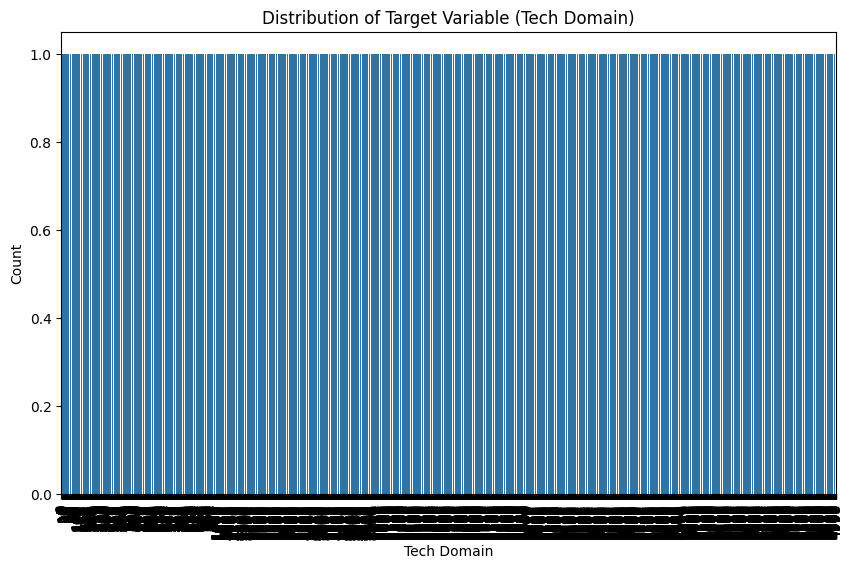

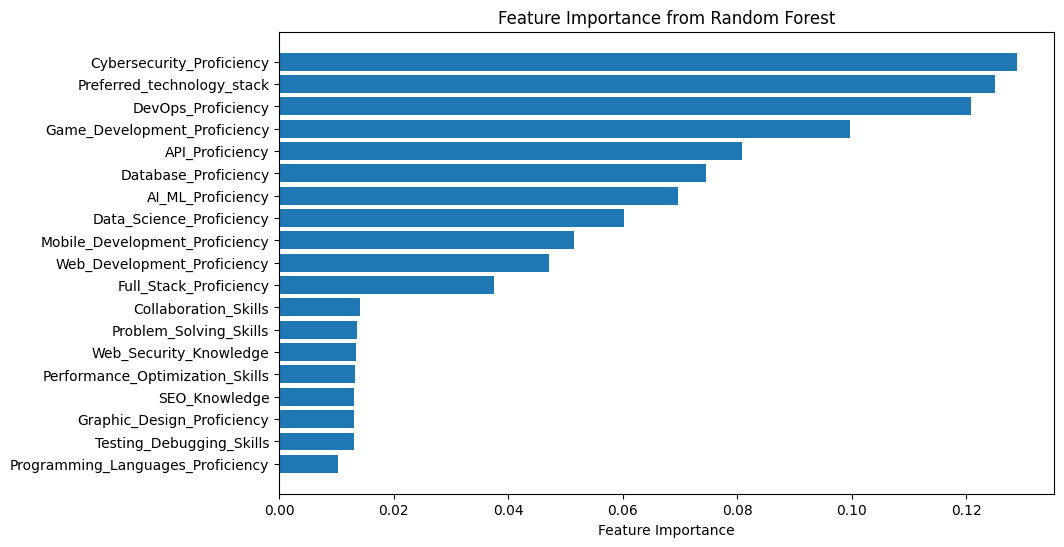

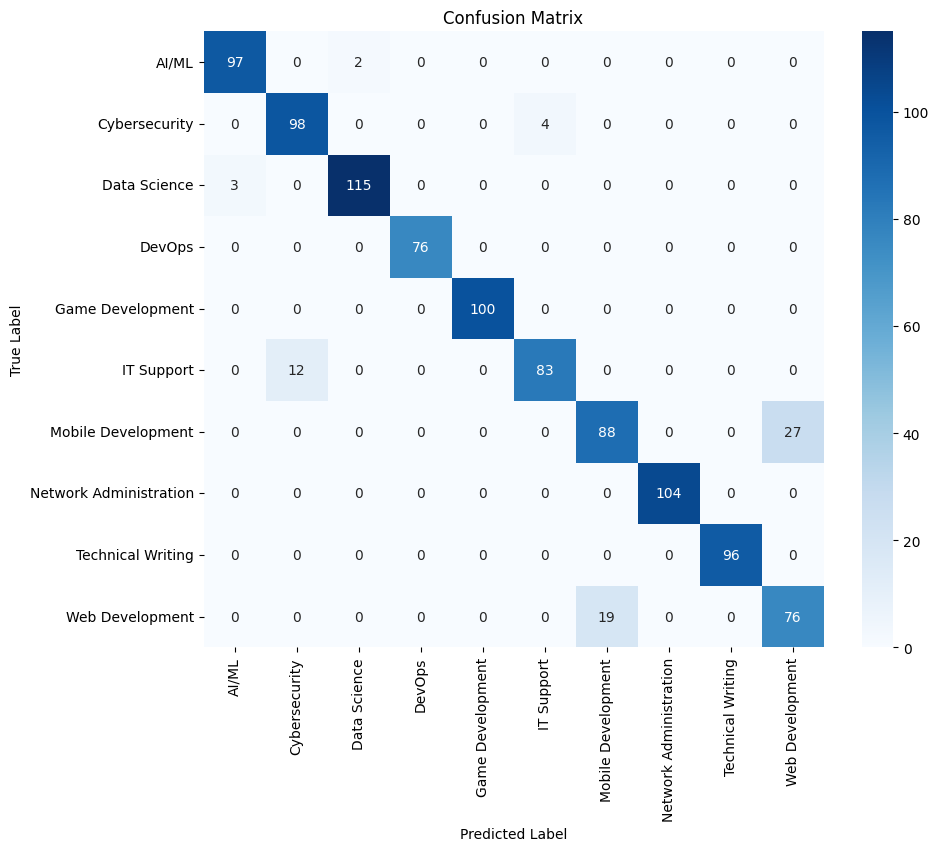

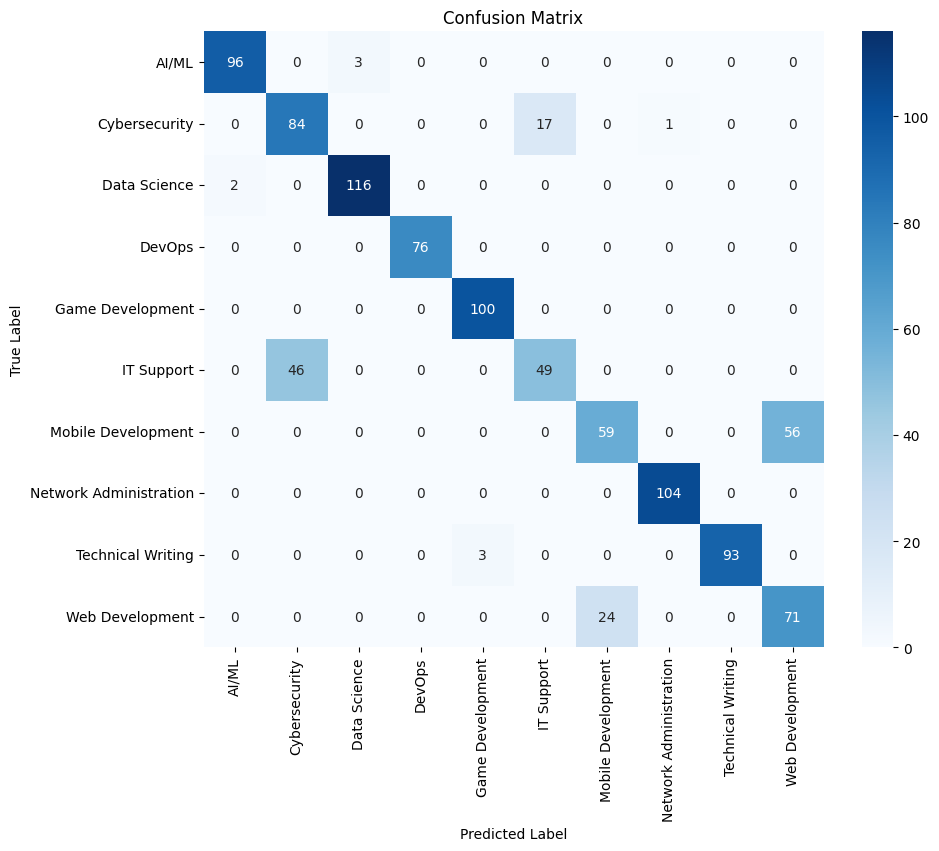

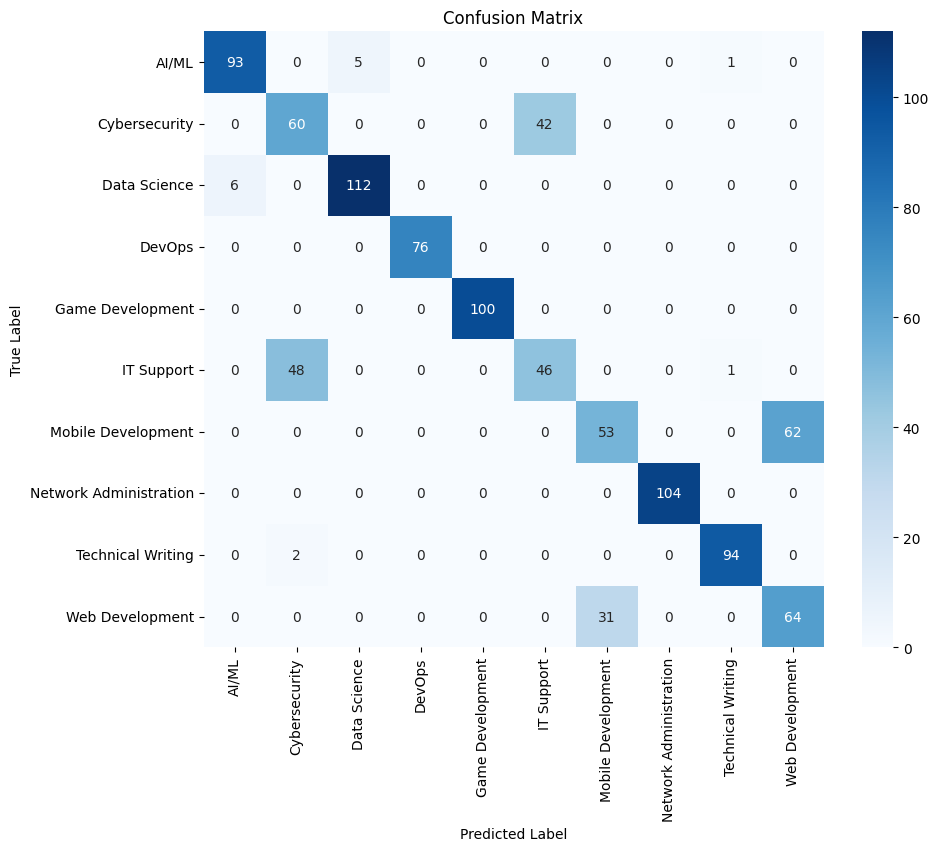

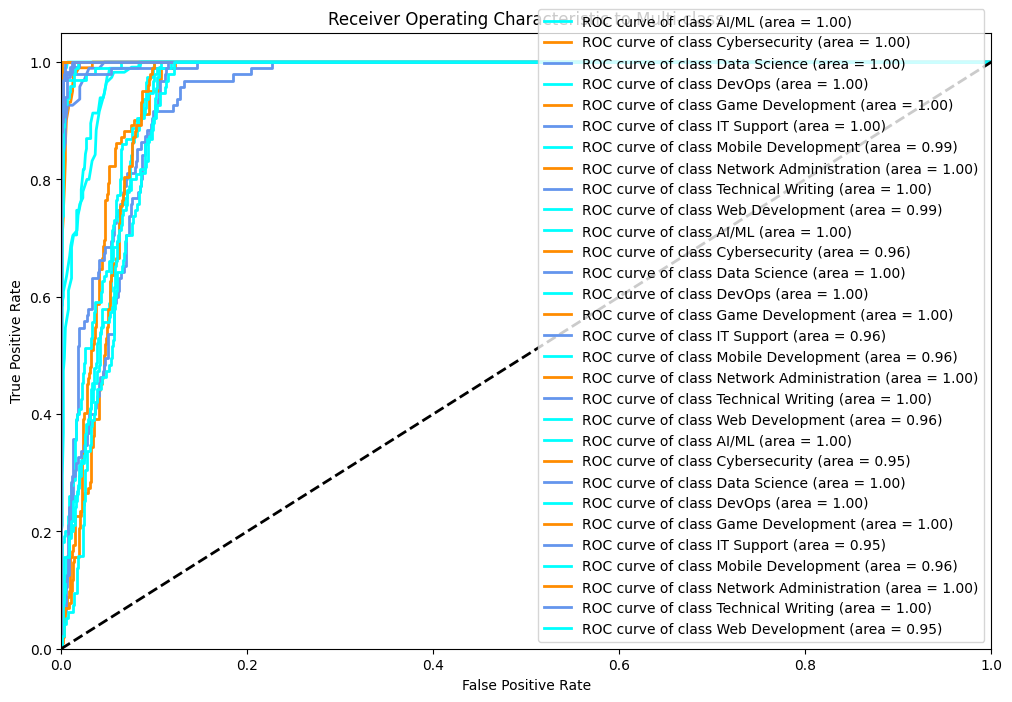

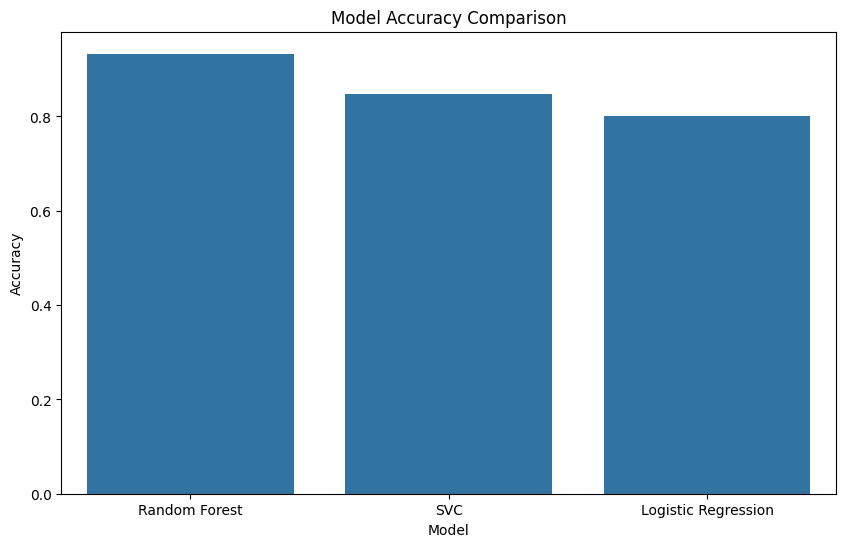

In [36]:
# Create a dictionary of models
models = {
    'Random Forest': rf_model,
    'SVC': svc_model,
    'Logistic Regression': lr_model
}

# Plot target distribution
plot_target_distribution(y)

# Plot feature importance for Random Forest
plot_feature_importance(rf_model, df.columns[:-1])

# Plot confusion matrices
plot_confusion_matrix(y_test, rf_predictions, label_encoders['Predicted_career_path'].classes_)
plot_confusion_matrix(y_test, svc_predictions, label_encoders['Predicted_career_path'].classes_)
plot_confusion_matrix(y_test, lr_predictions, label_encoders['Predicted_career_path'].classes_)

# Plot ROC curves
plot_roc_curves(models, X_test, y_test, label_encoders['Predicted_career_path'].classes_)

# Plot accuracy comparison
accuracies = [rf_accuracy, svc_accuracy, lr_accuracy]
model_names = ['Random Forest', 'SVC', 'Logistic Regression']
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [37]:
# Serialize the trained model using a library such as Pickle

# import pickle

# # Save the trained model to a file
# with open('./models/model_.pkl', 'wb') as f:
#   pickle.dump(rf_model, f)





In [52]:
# Load the saved model
with open('./models/model_.pkl', 'rb') as f:
  loaded_model = pickle.load(f)
    
# Predict the first value using the loaded model
# Assuming X_test is a DataFrame
first_sample = X_test.iloc[1]

# Reshape the sample if necessary (depends on your model's input shape)
first_sample_reshaped = first_sample.values.reshape(1, -1)

# Predict the first value using the loaded model
first_prediction = loaded_model.predict(first_sample_reshaped)

# Output the first prediction
print(first_prediction)

[2]


In [56]:
first_sample = X_test.iloc[1]
first_sample
first_sample_reshaped = first_sample.values.reshape(1, -1)
first_sample_reshaped 

array([[ 5,  4,  3,  8,  2,  3,  9,  3,  6,  7,  2,  2,  4,  1,  3,  7,
         1,  8, 36]], dtype=int64)

In [57]:
first_sample

Programming_Languages_Proficiency     5
Web_Development_Proficiency           4
Mobile_Development_Proficiency        3
Data_Science_Proficiency              8
DevOps_Proficiency                    2
Cybersecurity_Proficiency             3
AI_ML_Proficiency                     9
Game_Development_Proficiency          3
Database_Proficiency                  6
API_Proficiency                       7
Full_Stack_Proficiency                2
Problem_Solving_Skills                2
Collaboration_Skills                  4
Graphic_Design_Proficiency            1
Web_Security_Knowledge                3
Performance_Optimization_Skills       7
SEO_Knowledge                         1
Testing_Debugging_Skills              8
Preferred_technology_stack           36
Name: 2586, dtype: int64

In [58]:
first_sample_reshaped = first_sample.values
first_sample_reshaped 

array([ 5,  4,  3,  8,  2,  3,  9,  3,  6,  7,  2,  2,  4,  1,  3,  7,  1,
        8, 36], dtype=int64)